# Problem Statement

### 1. The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions

### 2. They want to understand if the spending habits differ between male and female customers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
%matplotlib inline

In [2]:
df = pd.read_csv("walmart_data.csv")

# Statistical Summary

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [120]:
df.shape

(550068, 10)

In [119]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Non Graphical Analysis

In [37]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n\n")

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64



P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00299742       1
P00298342       1
P00325342       1
P00075042       1
P00203642       1
Name: Product_ID, Length: 3631, dtype: int64



M    414259
F    135809
Name: Gender, dtype: int64



26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64



4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64



B    231173
C    171175
A    147720
Name: City_Categor

In [108]:
for i in df.columns:
    print(i, df[i].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category 20
Purchase 18105


### Insight : Gender ,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital Status, Product_Category can be considered as categorical columns.

# Univariate Analysis

In [349]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


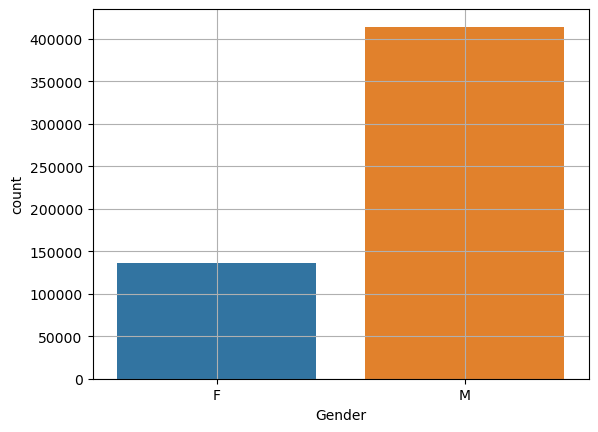

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [102]:
sns.countplot(x = "Gender" , data = df)
plt.grid()
plt.show()
df["Gender"].value_counts(normalize=True)*100

### Insight : Very High Populaiton of the customers are Males. Males constitute almost 75% of total customers
### Recommendation : Walmart needs to to excercise more marketing strategies for female customers for customer aqcuisation. This could include more products in the female category


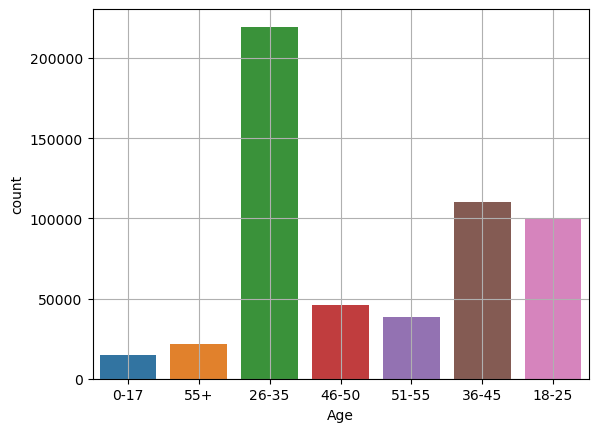

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [104]:
sns.countplot(x = "Age" , data = df)
plt.grid()
plt.show()
df["Age"].value_counts(normalize=True)*100

### Insights : Most numbers of the customers are in the age group 26-35 , Second highest customers belong to the 35-45 category. 
### Recommendations : For others , discounts and offers should be presented so that there is more customer aqcuisation from different age groups 

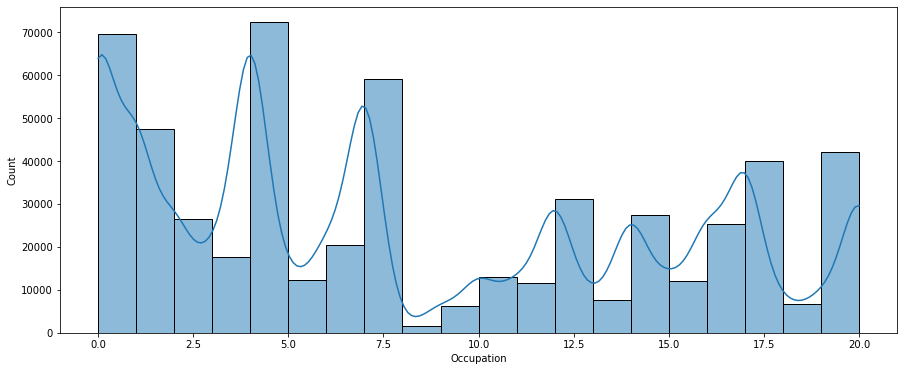

In [257]:
plt.figure(figsize=(15,6))
sns.histplot(x = "Occupation" , data = df,bins = 20,kde = True)
plt.show()

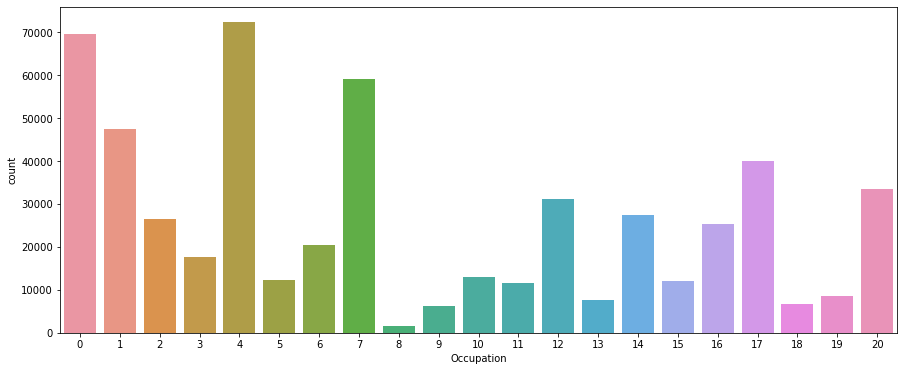

In [259]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Occupation" , data = df)
plt.show()

### Insights : There is high population of customers from 0-7 years of occupation. This could be due to age as well. Young customers often come out to buy stuff rather than Old customers.


### Recommendations :  Walmart should introduce free delivery marketing technique for high aged customers

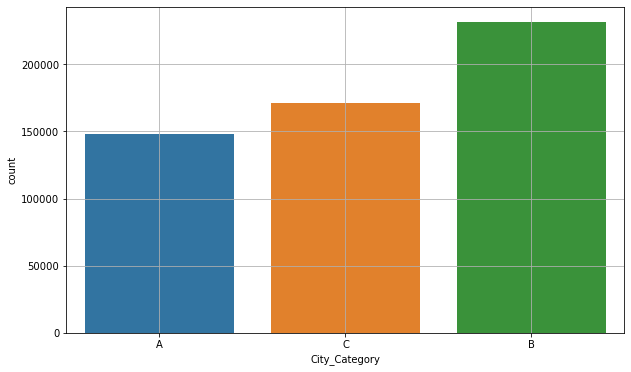

In [182]:
plt.figure(figsize=(10,6))
fig = sns.countplot(x = "City_Category" , data = df)
plt.grid()
plt.show()

### Insights : Most numbers of the customers are in the City Category "B". This could be because of the number of stores and income capacity of the people in the respective City.
### Recommendations : Walmart can bring in more stores in A and C. Walmart prices should be according to the city category

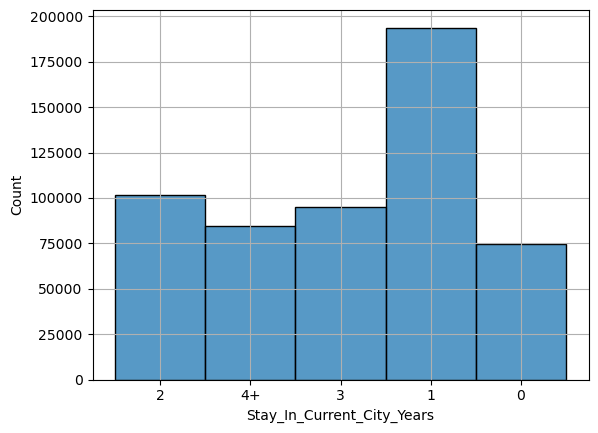

In [63]:
sns.histplot(x = "Stay_In_Current_City_Years" , data = df)
plt.grid()
plt.show()


### Insights : Highest count of Walmart Customers are staying in the city for 1 year . This could be due to purchase of products which are required in setting up houses and offices.

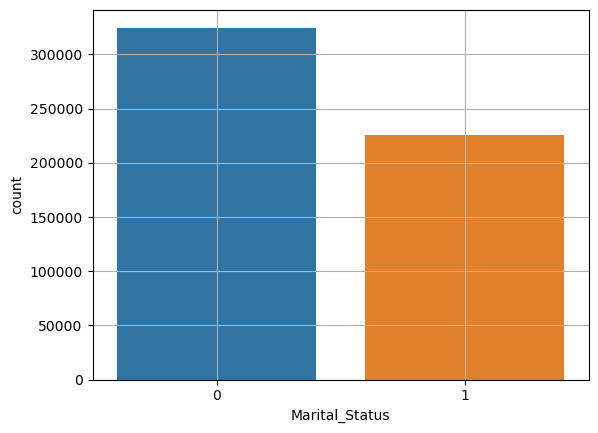

In [62]:
sns.countplot(x = "Marital_Status" , data = df)
plt.grid()
plt.show()

In [250]:
df["Marital_Status"].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

### Insights : Almost 60 percent of the customers are single.

### Recommedations :  Walmart should bring in more categories of goods which are specifially for married couples, which would attract married couples

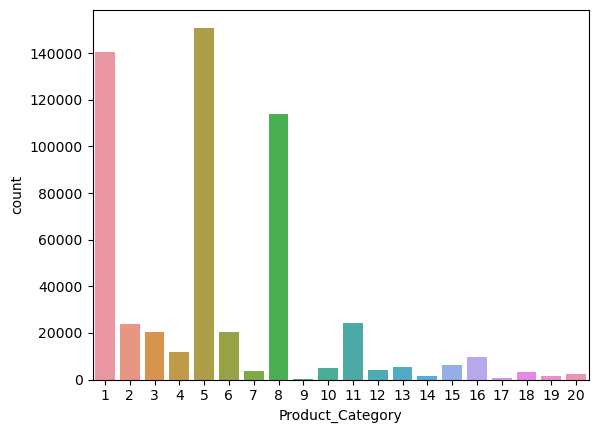

In [66]:
sns.countplot(x = "Product_Category" , data = df)
plt.show()

### Insight : Basic Category products are being bought higher than the High End Products


/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


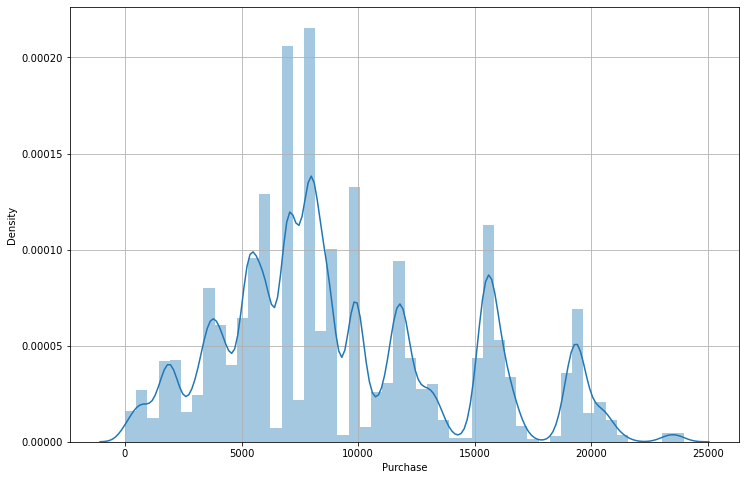

In [185]:
plt.figure(figsize=(12,8))
sns.distplot(df["Purchase"])
plt.grid()
plt.show()

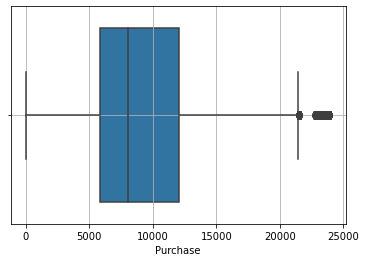

In [158]:
sns.boxplot(x = "Purchase" , data = df )
plt.grid()
plt.show()

In [93]:
outliers = df[df["Purchase"]>df["Purchase"].quantile(0.75)+1.5*(df["Purchase"].quantile(0.75)-df["Purchase"].quantile(0.25))]

In [96]:
len(outliers)/len(df)*100

0.4866671029763593

In [284]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

### Insights : 
### - The purchase values mostly lie between 5823-12054 
### - There are few outliers in the data which in the upper category which constitutes only 0.48% of the total data 
### - Mean of the purchase value is 9263.968713

# BI Variate Analysis

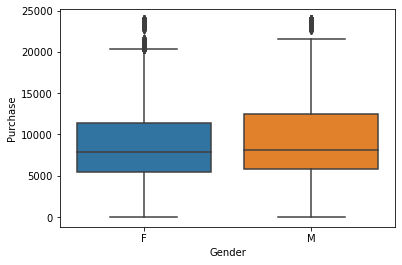

In [126]:
sns.boxplot(x = "Gender" , y = "Purchase" , data=df)

In [288]:
print(df.groupby(by="Gender")["Purchase"].sum())
print(df.groupby(by="Gender")["Purchase"].mean())

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


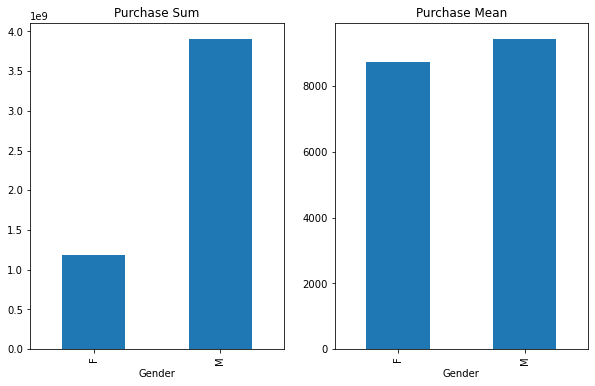

In [350]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Purchase Sum")
df.groupby(by="Gender")["Purchase"].sum().plot(kind = "bar")
plt.subplot(1,2,2)
plt.title("Purchase Mean")
df.groupby(by="Gender")["Purchase"].mean().plot(kind = "bar")

### Insight : Male contribute large percentage of the total revenue even though the Purchase Mean for Male and Female are similar. This due to high frequency of customers are male

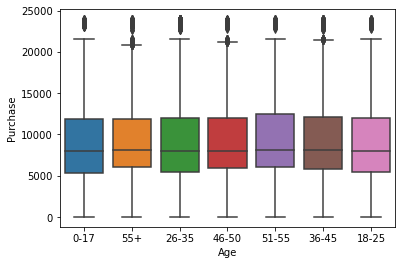

In [127]:
sns.boxplot(x = "Age" , y = "Purchase" , data=df)

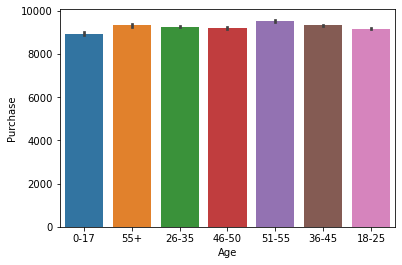

In [143]:
sns.barplot(x = "Age" , y = "Purchase" , data = df)

In [142]:
print(df.groupby(by="Age")["Purchase"].sum())
print(df.groupby(by="Age")["Purchase"].mean())

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


Text(0.5, 1.0, 'Purchase Sum')

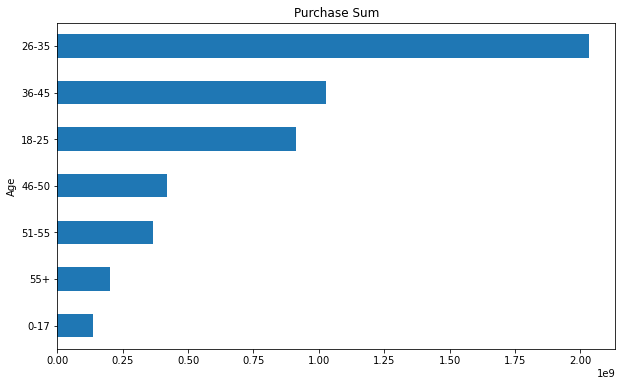

In [318]:
plt.figure(figsize=(10,6))
df.groupby(by="Age")["Purchase"].sum().sort_values(ascending  = True).plot(kind= "barh")
plt.title("Purchase Sum")

### Insights : People from the age group "26-35" are the highest contributor to the revenue for Walmart

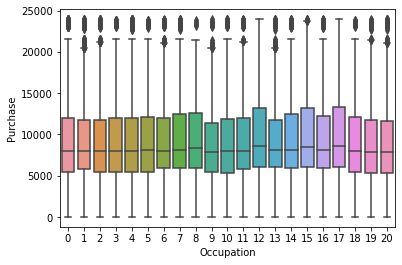

In [146]:
sns.boxplot(x = "Occupation" , y = "Purchase" , data =df)

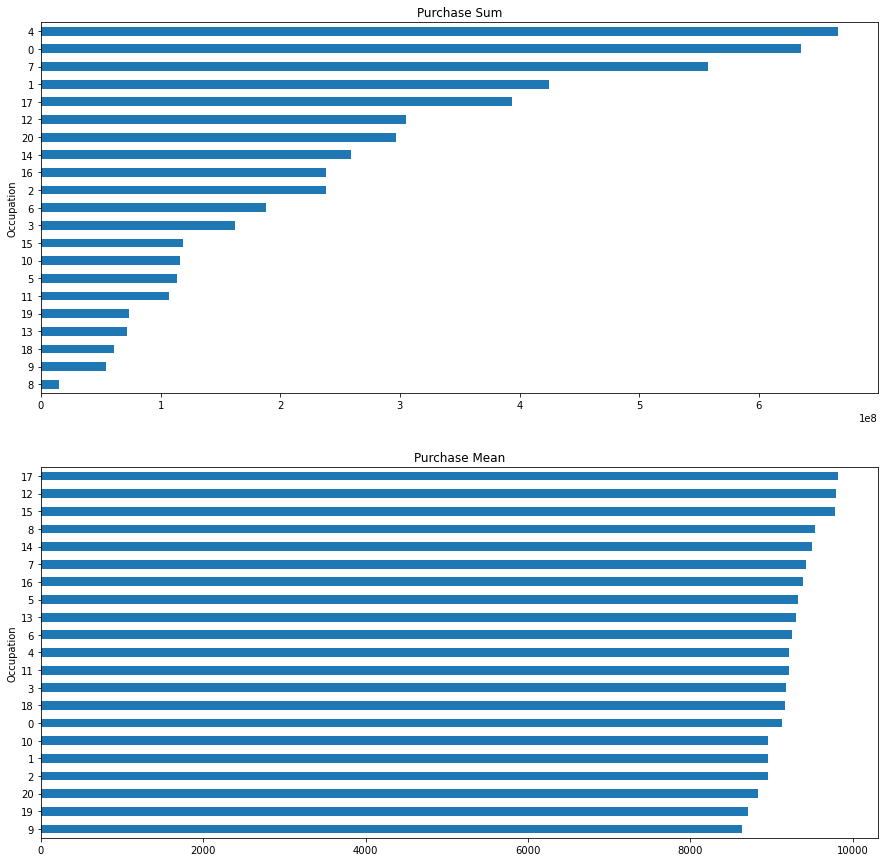

In [444]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.title("Purchase Sum")
df.groupby(by="Occupation")["Purchase"].sum().sort_values(ascending= True).plot(kind = "barh")
plt.subplot(2,1,2)
plt.title("Purchase Mean")
df.groupby(by="Occupation")["Purchase"].mean().sort_values(ascending = True).plot(kind = "barh")

### Insights : Occupations 4, 0, 7 are the top three highest revenue contributors whereas 18,9,8 being the lowest.

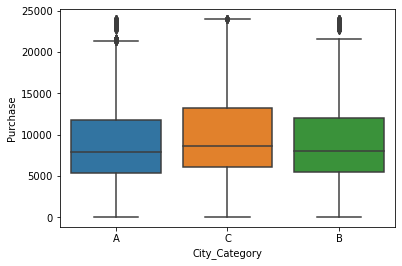

In [147]:
sns.boxplot(x = "City_Category" , y = "Purchase" , data =df)

In [149]:
print(df.groupby(by="City_Category")["Purchase"].sum())
print(df.groupby(by="City_Category")["Purchase"].mean())

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64
City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


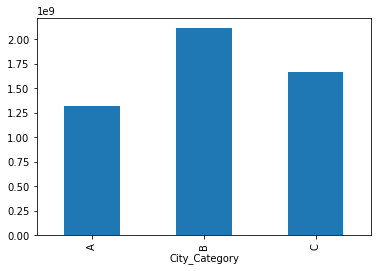

In [332]:
df.groupby(by="City_Category")["Purchase"].sum().plot(kind = "bar")

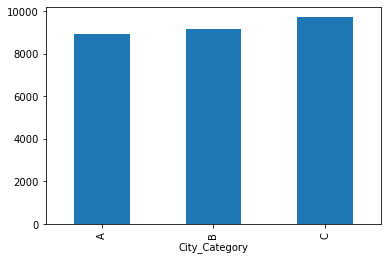

In [333]:
df.groupby(by="City_Category")["Purchase"].mean().plot(kind = "bar")

### Insights : Within city category, people from B have the highest purchase sum and C has the highest average of Purchase.

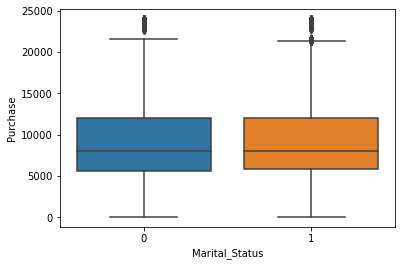

In [198]:
sns.boxplot(x = "Marital_Status" , y = "Purchase" , data =df)

In [344]:
print(df.groupby(by="Marital_Status")["Purchase"].sum())
print(df.groupby(by="Marital_Status")["Purchase"].mean())

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64
Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


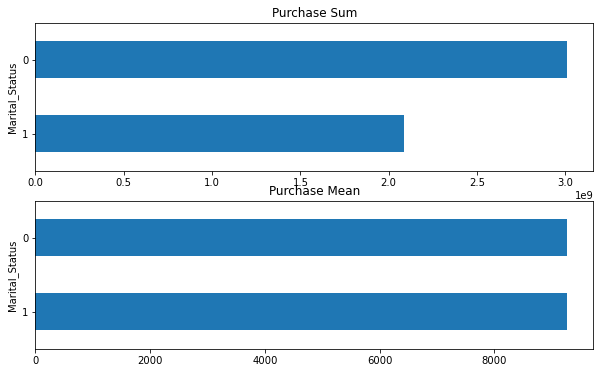

In [347]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.title("Purchase Sum")
df.groupby(by="Marital_Status")["Purchase"].sum().sort_values(ascending= True).plot(kind = "barh")
plt.subplot(2,1,2)
plt.title("Purchase Mean")
df.groupby(by="Marital_Status")["Purchase"].mean().sort_values(ascending = True).plot(kind = "barh")

### Insights : Single people tend to spend more in walmart, even though the average purchase is almost the same

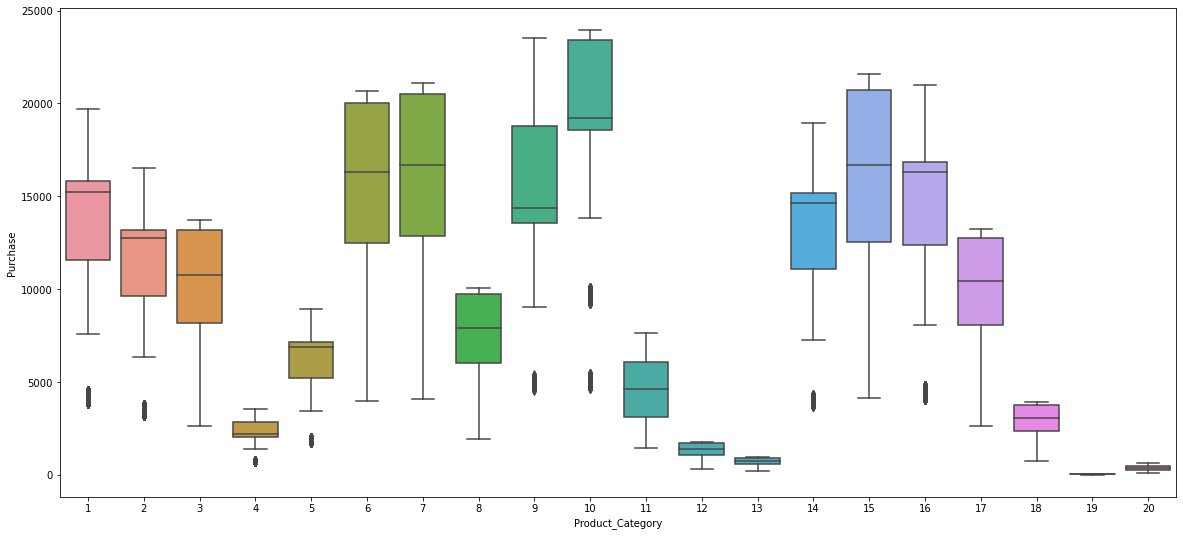

In [199]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "Product_Category" , y = "Purchase" , data =df)

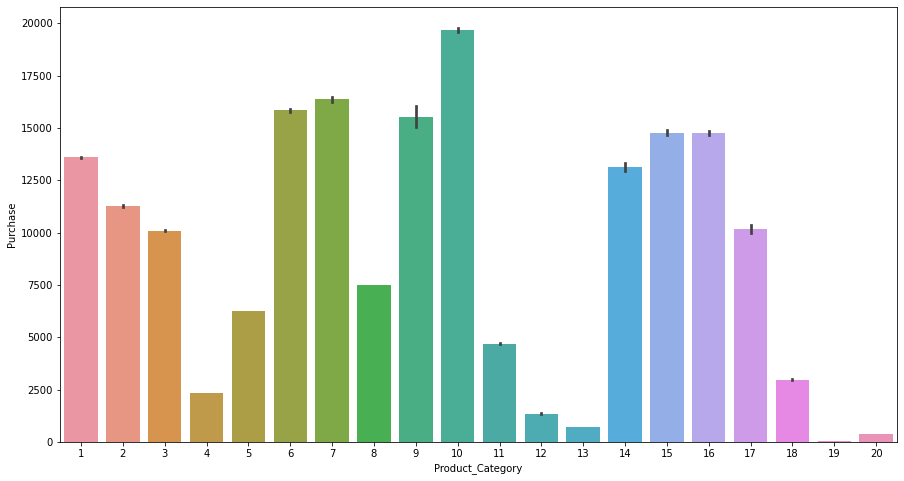

In [337]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Product_Category" , y = "Purchase" , data =df)

### Insights : The highest purchase amount range is from the following Product Categories :
- Product Category 10
- Product Category 7
- Product Category 6
- Product Category 9

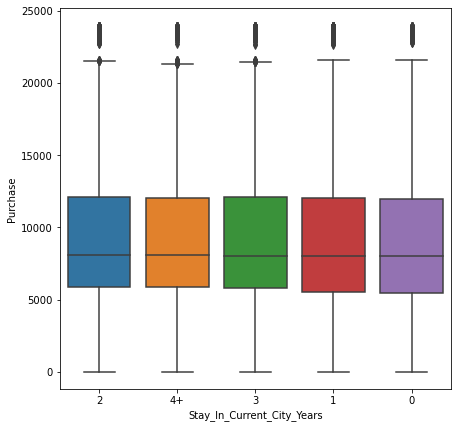

In [335]:
plt.figure(figsize=(7,7))
sns.boxplot(x = "Stay_In_Current_City_Years" , y = "Purchase" , data =df)

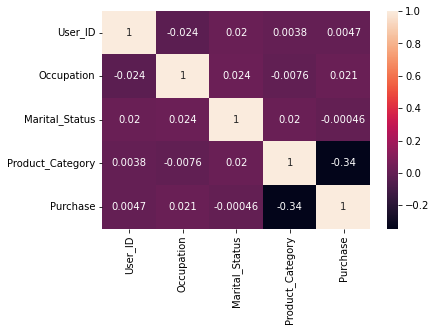

In [164]:
sns.heatmap(df.corr(), annot=True)

### Insights
### - There is a negative correlation between product category and Purchase Amount. There is low amount of revenue generated for the high end goods. This could be due to Price of the product and Income capacities of the customer
### - Rest all other categories have positive correlation


### Recommendation : Niche products should be on discounts and offer every couple of months to attract the buyer

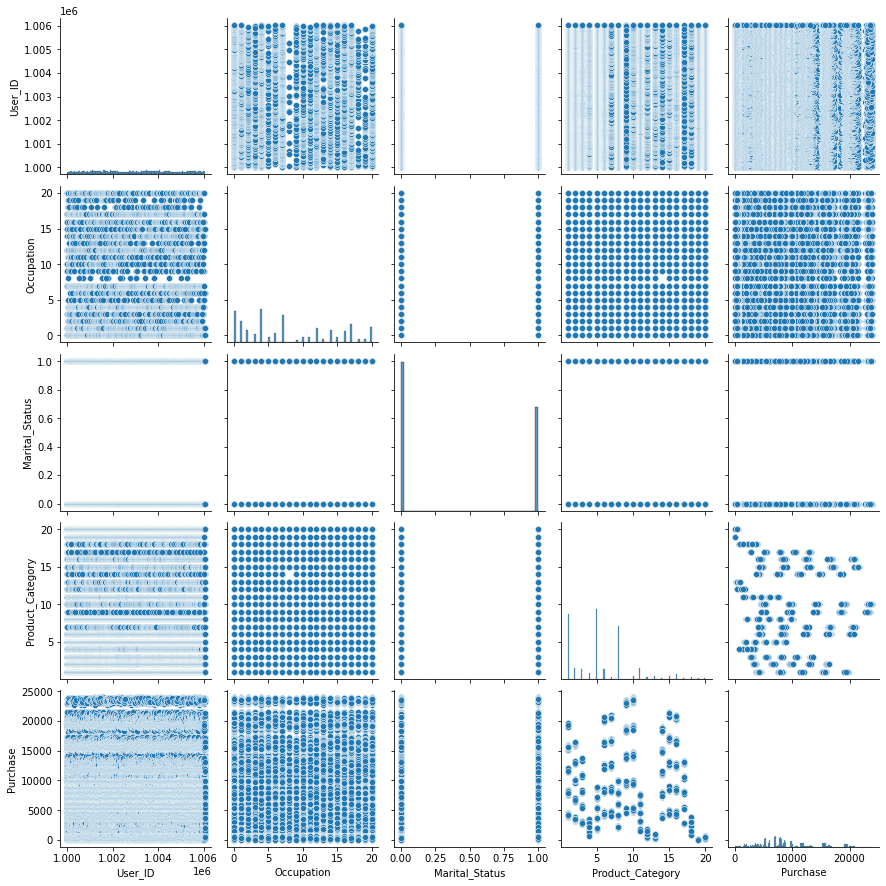

In [173]:
sns.pairplot(df)
plt.show()

# Central Limit Theorem Analysis

## Analysis Between Purchase and Gender

In [188]:
df_male = df[df["Gender"]=="M"]
df_female = df[df["Gender"]=="F"]

In [235]:
df_male_mean = []
for i in range(0,101):
    df_male_mean.append(df_male.sample(100000)["Purchase"].mean())

In [242]:
se_male = df_male["Purchase"].std()/100000**0.5
se_male

16.1029066925983

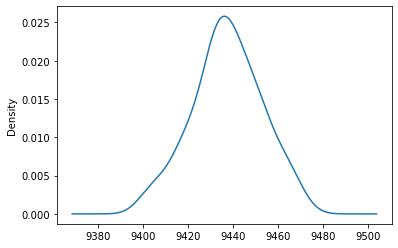

In [236]:
pd.Series(df_male_mean).plot(kind="kde")

In [246]:
np.mean(df_male_mean)-3*(se_male) , np.mean(df_male_mean)+3*(se_male)


(9389.12804338755, 9485.745483543142)

In [237]:
df_female_mean = []
for i in range(0,101):
    df_female_mean.append(df_female.sample(100000)["Purchase"].mean())

In [247]:
se_female = df_male["Purchase"].std()/100000**0.5
print(se_female)
np.mean(df_female_mean)-3*(se_female) , np.mean(df_female_mean)+3*(se_female)


16.1029066925983


(8687.067639328146, 8783.685079483737)

In [ ]:
print("99 percent Confidence Interval")
np.mean(df_female_mean)-3*(se_female) , np.mean(df_female_mean)+3*(se_female)
print("95 percent Confidence Interval")
np.mean(df_female_mean)-2*(se_female) , np.mean(df_female_mean)+2*(se_female)
print("68 percent Confidence Interval")
np.mean(df_female_mean)-1*(se_female) , np.mean(df_female_mean)+1*(se_female)



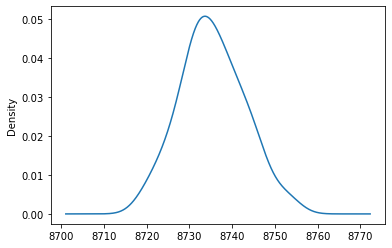

In [238]:
pd.Series(df_female_mean).plot(kind="kde")

<ipython-input-382-06787c7e0968>:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


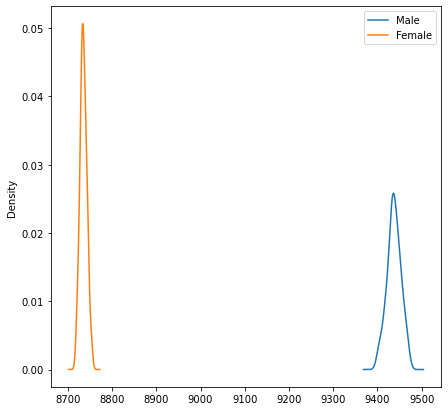

In [382]:
plt.figure(figsize=(7,7))
pd.Series(df_male_mean).plot(kind="kde")
pd.Series(df_female_mean).plot(kind="kde")
plt.legend(["Male" , "Female"])
fig.show()

### Confidence Intervals wrt to Gender

### For men , 99 percent chances that the mean lies between the range (9389.12804338755, 9485.745483543142)
### For women , 99 percent chances that the mean lies between the range (8687.067639328146, 8783.685079483737)
### Men are spending more on purchasing stuff
### This could be due to income and spending capacity of men.
### Also , it could be to due the gender product oreintation of the goods in walmart



In [277]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## Analysis Between Purchase and Marital Status

In [352]:
df_single = df[df["Marital_Status"]==0]
df_married = df[df["Marital_Status"]==1]

In [356]:
sample_size = 200000

In [358]:
se_single = df_single["Purchase"].std()/sample_size**0.5

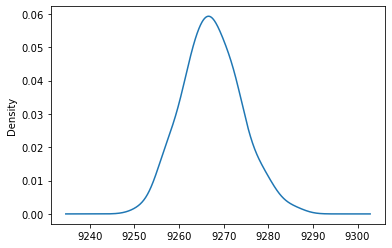

In [355]:
df_single_mean = []
for i in range(0,101):
    df_single_mean.append(df_single.sample(sample_size)["Purchase"].mean())
    
pd.Series(df_single_mean).plot(kind = "kde")

In [363]:
np.mean(df_single_mean)-3*(se_single) , np.mean(df_single_mean)+3*(se_single)


(9233.600472651131, 9301.049422002336)

In [364]:
se_married = df_married["Purchase"].std()/sample_size**0.5

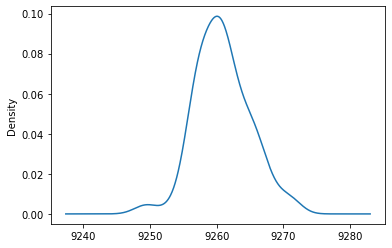

In [365]:
df_married_mean = []
for i in range(0,101):
    df_married_mean.append(df_married.sample(sample_size)["Purchase"].mean())
    
pd.Series(df_married_mean).plot(kind = "kde")

In [368]:
np.mean(df_married_mean)-3*(se_married) , np.mean(df_married_mean)+3*(se_married)

(9227.205343885304, 9294.514085322618)

In [370]:
single = pd.Series(df_single_mean)
married = pd.Series(df_married_mean)

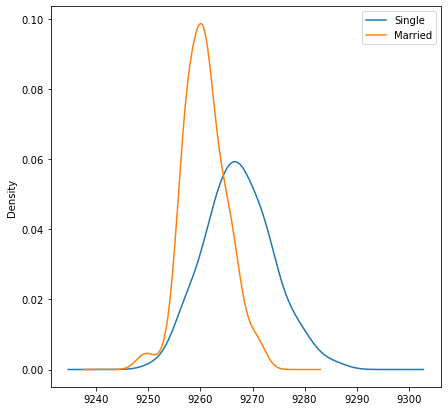

In [383]:
plt.figure(figsize=(7,7))
single.plot(kind = "kde" , legend = True)
married.plot(kind = "kde" , legend = True)
plt.legend(["Single" , "Married"])

### Confidence Interval wrt Marital Status 

### There is a certain overlap between the meana ranges of Purchase Amount for Single and Married People

### For single 99 percent chances are mean lies between (9233.600472651131, 9301.049422002336)

### For married , 99 percent chances are mean lies between (9227.205343885304, 9294.514085322618)

## Analysis Between Purchase and Age

In [385]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [421]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [428]:
def CLT(colname , colvalue):
    sample_size = 10000
    sample_df = df[df[colname]==colvalue]
    sample_se = sample_df["Purchase"].std()/sample_size**0.5
    sample_mean_list = []
    for i in range(0,101):
        sample_mean_list.append(sample_df.sample(sample_size)["Purchase"].mean())
    print("Confidence Interval 99% ", colvalue , ":" ,np.mean(sample_mean_list)-3*(sample_se),"-", np.mean(sample_mean_list)+3*(sample_se))
    return pd.Series(sample_mean_list)

In [429]:
lst_mean_1 = CLT("Age" , "0-17")
lst_mean_2 = CLT("Age" , "18-25")
lst_mean_3 = CLT("Age" , "26-35")
lst_mean_4 = CLT("Age" , "36-45")
lst_mean_5 = CLT("Age" , "46-50")
lst_mean_6 = CLT("Age" , "51-55")
lst_mean_7 = CLT("Age" , "55+")



Confidence Interval 99%  0-17 : 8777.071581590215 - 9083.73842435038
Confidence Interval 99%  18-25 : 9026.461518302525 - 9328.52083813312
Confidence Interval 99%  26-35 : 9106.941279919813 - 9407.57291809999
Confidence Interval 99%  36-45 : 9176.695961841682 - 9478.071394593962
Confidence Interval 99%  46-50 : 9060.752960470862 - 9358.785942499439
Confidence Interval 99%  51-55 : 9385.153539790152 - 9690.39562456628
Confidence Interval 99%  55+ : 9185.547498943779 - 9486.237138679982


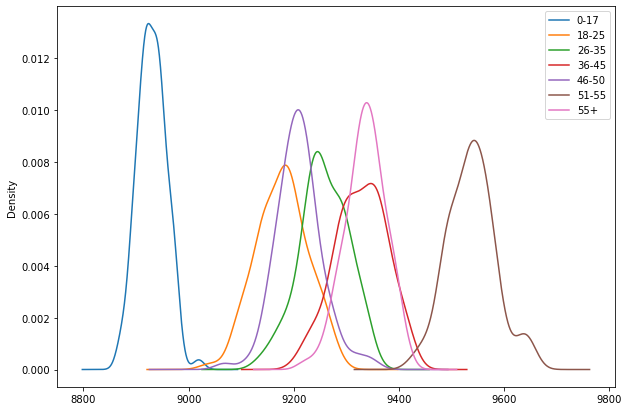

In [435]:
plt.figure(figsize=(10,7))
lst_mean_1.plot(kind = "kde")
lst_mean_2.plot(kind = "kde")
lst_mean_3.plot(kind = "kde")
lst_mean_4.plot(kind = "kde")
lst_mean_5.plot(kind = "kde")
lst_mean_6.plot(kind = "kde")
lst_mean_7.plot(kind = "kde")
plt.legend(["0-17" ,"18-25","26-35","36-45","46-50","51-55","55+" ])

### Confidence Intervals wrt to Age

- Confidence Interval 99%  0-17 : 8777.071581590215 - 9083.73842435038
- Confidence Interval 99%  18-25 : 9026.461518302525 - 9328.52083813312
- Confidence Interval 99%  26-35 : 9106.941279919813 - 9407.57291809999
- Confidence Interval 99%  36-45 : 9176.695961841682 - 9478.071394593962
- Confidence Interval 99%  46-50 : 9060.752960470862 - 9358.785942499439
- Confidence Interval 99%  51-55 : 9385.153539790152 - 9690.39562456628
- Confidence Interval 99%  55+ : 9185.547498943779 - 9486.237138679982

### There is overlapping between all age groups except 0-17 and 51-55 

### The lowest mean for Purchase Amount is from the 0-17 Age Category

### The Highest mean for Purchase Amount is from the 51-55 Age Category